In [2]:
%load_ext autoreload
%autoreload 2

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

sns.set(style="whitegrid")

from api.questrade import QTClient

In [152]:
REFRESH_TOKEN = "Gfq3Gbo2tijC5QBS6h_8MpUAnWn3BqGt0"

In [153]:
client = QTClient(REFRESH_TOKEN)

# Show Open Positions

In [155]:
positions = pd.DataFrame(client.get_account_positions())

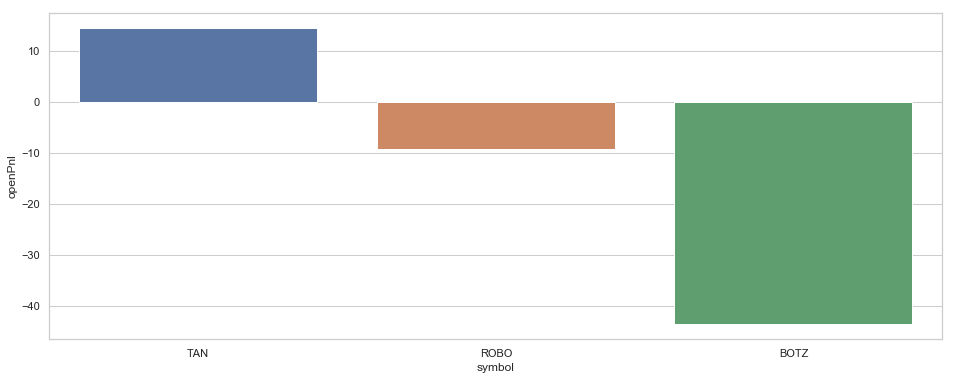

In [156]:
%matplotlib inline
plt.figure(figsize=(16, 6))
sns.barplot(x="symbol", y="openPnl", data=positions.sort_values(by=['openPnl'], ascending=False))

In [157]:
print("Open PnL: %f" % (positions['openPnl'].sum()))

Open PnL: -38.259804


# Examine BOTZ

# Put all market data into one DataFrame

In [158]:
positions

,averageEntryPrice,closedPnl,closedQuantity,currentMarketValue,currentPrice,dayPnl,isRealTime,isUnderReorg,openPnl,openQuantity,symbol,symbolId,totalCost
0,40.800000,0,0,194.80,38.96,0.50,False,False,-9.200000,5,ROBO,4807280,204.000000
1,23.510000,0,0,249.70,24.97,-0.80,False,False,14.600000,10,TAN,21806477,235.100000
2,23.398317,0,0,237.12,19.76,-0.12,False,False,-43.659804,12,BOTZ,15029143,280.779804


In [186]:
FROM_DATE = '2016-10-01T00:00:00-05:00'
TO_DATE = '2019-10-20T23:59:59-05:00'

historicals = pd.DataFrame()
for index, row in positions.iterrows():
    symbol_id = row['symbolId']
    symbol = row['symbol']
    candles = pd.DataFrame(client.get_candles(symbol_id, FROM_DATE, TO_DATE, 'OneDay'))
    candles['end'] =  pd.to_datetime(candles['end'], format='%Y-%m-%d')
    candles['symbol'] = symbol
    candles['symbolId'] = symbol_id
    historicals = historicals.append(candles)
historicals = historicals.set_index("end")

In [187]:
historicals

,VWAP,close,high,low,open,start,volume,symbol,symbolId
end,,,,,,,,,
2016-10-04 04:00:00.000,28.497500,28.2925,28.9900,28.2100,28.990,2016-10-03T00:00:00.000000-04:00,35114,ROBO,4807280
2016-10-05 04:00:00.000,28.187333,28.1470,28.4000,28.0150,28.400,2016-10-04T00:00:00.000000-04:00,17303,ROBO,4807280
2016-10-06 04:00:00.000,28.316633,28.3300,28.4099,28.2100,28.280,2016-10-05T00:00:00.000000-04:00,11134,ROBO,4807280
2016-10-07 04:00:00.000,28.210000,28.2100,28.3200,28.1000,28.110,2016-10-06T00:00:00.000000-04:00,29255,ROBO,4807280
2016-10-08 04:00:00.000,28.125000,28.1550,28.2000,28.0200,28.170,2016-10-07T00:00:00.000000-04:00,26596,ROBO,4807280
2016-10-11 04:00:00.000,28.296667,28.2200,28.4900,28.1800,28.490,2016-10-10T00:00:00.000000-04:00,33749,ROBO,4807280
2016-10-12 04:00:00.000,27.893333,27.7600,28.2300,27.6900,28.230,2016-10-11T00:00:00.000000-04:00,36825,ROBO,4807280
2016-10-13 04:00:00.000,27.754667,27.7200,27.8900,27.6540,27.890,2016-10-12T00:00:00.000000-04:00,15341,ROBO,4807280
2016-10-14 04:00:00.000,27.416633,27.4800,27.5699,27.2000,27.450,2016-10-13T00:00:00.000000-04:00,48533,ROBO,4807280


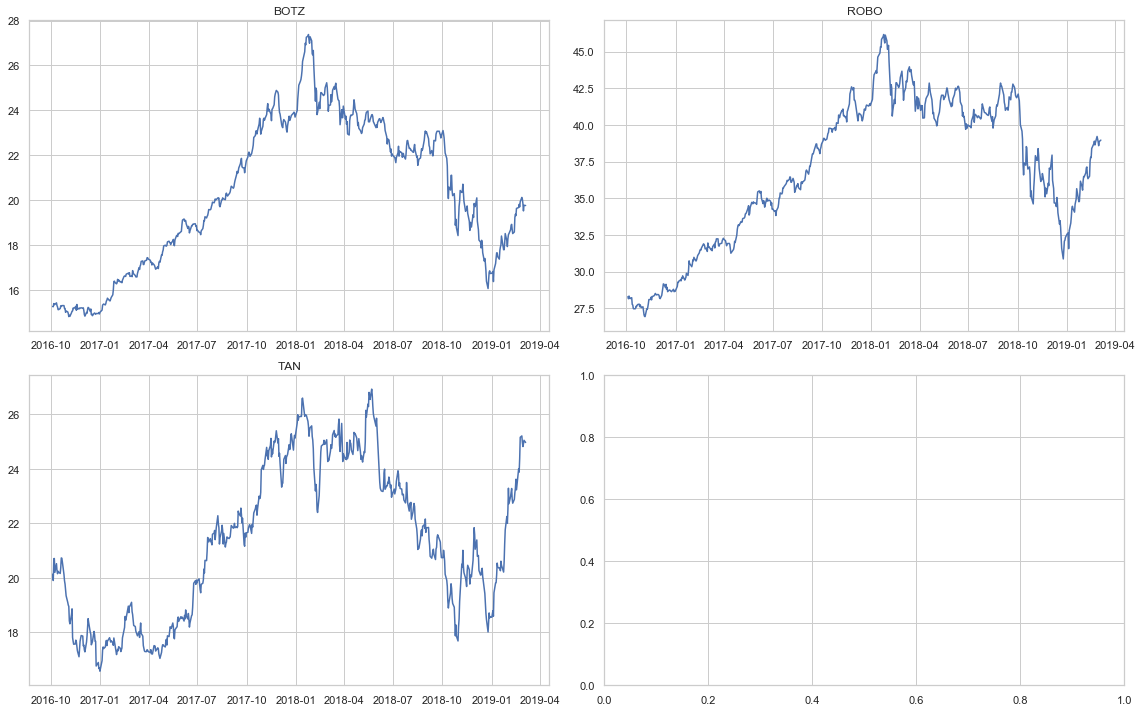

In [188]:
grouped = historicals.groupby('symbol')
rows = math.ceil(grouped.ngroups / 2)                    
fig, axs = plt.subplots(figsize=(16,10), nrows=rows, ncols=2)

targets = zip(grouped.groups.keys(), axs.flatten())
for i, (key, ax) in enumerate(targets):
    ax.plot(grouped.get_group(key)['close'])
    ax.set_title(key)

plt.tight_layout()

plt.show()

In [213]:
botz_historicals = historicals[historicals['symbol'] == 'TAN']
botz_historicals['daily_returns'] = botz_historicals['close'].pct_change()
botz_historicals['total_returns'] = (1 + botz_historicals['daily_returns']).cumprod() - 1

/Users/kzabashta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/kzabashta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [214]:
historicals

,VWAP,close,high,low,open,start,volume,symbol,symbolId,daily_returns,total_returns
end,,,,,,,,,,,
2016-10-04 04:00:00.000,28.497500,28.2925,28.9900,28.2100,28.990,2016-10-03T00:00:00.000000-04:00,35114,ROBO,4807280,NaN,NaN
2016-10-05 04:00:00.000,28.187333,28.1470,28.4000,28.0150,28.400,2016-10-04T00:00:00.000000-04:00,17303,ROBO,4807280,-0.005143,-0.005143
2016-10-06 04:00:00.000,28.316633,28.3300,28.4099,28.2100,28.280,2016-10-05T00:00:00.000000-04:00,11134,ROBO,4807280,0.006502,0.001325
2016-10-07 04:00:00.000,28.210000,28.2100,28.3200,28.1000,28.110,2016-10-06T00:00:00.000000-04:00,29255,ROBO,4807280,-0.004236,-0.002916
2016-10-08 04:00:00.000,28.125000,28.1550,28.2000,28.0200,28.170,2016-10-07T00:00:00.000000-04:00,26596,ROBO,4807280,-0.001950,-0.004860
2016-10-11 04:00:00.000,28.296667,28.2200,28.4900,28.1800,28.490,2016-10-10T00:00:00.000000-04:00,33749,ROBO,4807280,0.002309,-0.002563
2016-10-12 04:00:00.000,27.893333,27.7600,28.2300,27.6900,28.230,2016-10-11T00:00:00.000000-04:00,36825,ROBO,4807280,-0.016300,-0.018821
2016-10-13 04:00:00.000,27.754667,27.7200,27.8900,27.6540,27.890,2016-10-12T00:00:00.000000-04:00,15341,ROBO,4807280,-0.001441,-0.020235
2016-10-14 04:00:00.000,27.416633,27.4800,27.5699,27.2000,27.450,2016-10-13T00:00:00.000000-04:00,48533,ROBO,4807280,-0.008658,-0.028718


symbol
TAN    AxesSubplot(0.125,0.2;0.775x0.68)
Name: total_returns, dtype: object

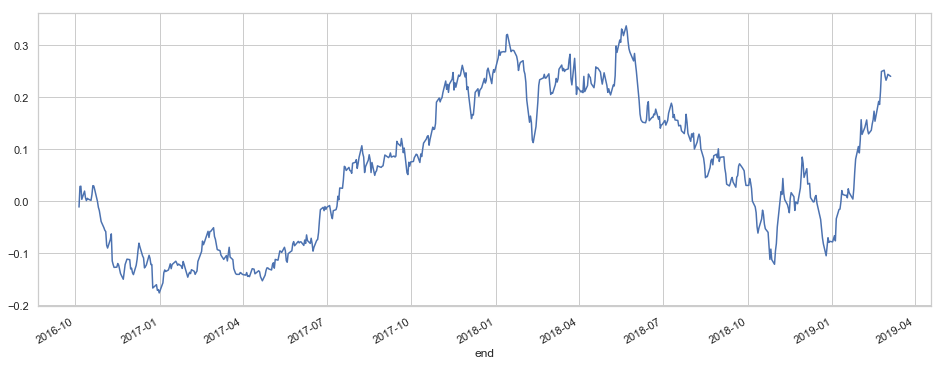

In [215]:
plt.figure(figsize=(16, 6))
botz_historicals.groupby('symbol')['total_returns'].plot()